# Machine Learning Assignment 3


In [64]:
#Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://www.google.com/search?q=gini+index+formula&tbm=isch&ved=2ahUKEwj2xp_hmsrsAhXDMN8KHTurCn0Q2-cCegQIABAA&oq=gini+index+formula&gs_lcp=CgNpbWcQAzICCAAyAggAMgIIADIGCAAQBRAeMgQIABAYMgQIABAYMgQIABAYMgQIABAYMgQIABAYOgYIABAIEB5Qvw9YtRpgwBtoAHAAeAGAAcIBiAHHBZIBAzYuMZgBAKABAaoBC2d3cy13aXotaW1nwAEB&sclient=img&ei=jYiSX7bMOcPh_Aa71qroBw&bih=689&biw=630#imgrc=ICbn8krtgakNkM")

%matplotlib inline

## Random Forest Binary Classification: 



### 1. Data Processing:

### a) Import the data: shape should be (30000,24)


In [8]:
dataset = pd.read_csv("default of credit card clients.csv")
dataset.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [9]:
dataset.shape

(30000, 24)

### b) Remove any rows that have missing data.


In [11]:
#Checking for missing data
print(dataset.isnull().sum())

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


- Based on the above results we can observe that there aren't any missing values


### c) The target / y variable is "default payment next month" column. Keep all predictors for the X df except for the target variable. 


In [12]:
X = dataset.iloc[:,0:23]
y = dataset.iloc[:,-1]


### d) Split data into train / test set using an 70/30 split. Recall that you should be generating an X_train, X_test, y_train, and y_test.

In [14]:
#Splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=10)

## 2. Random Forest Classifier - Base Model:



### Start by creating a simple Random Forest only using default parameters.

### a) Use the RandomForestClassifier in sklearn. Fit your model on the training data & make sure to add a random_state (check documentation to confirm how to do this). 

In [19]:
# Instantiate a random forests classifer
rf = RandomForestClassifier(random_state=20)
# Fitting the data to the data
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=20)

### b) Use the fitted model to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

In [20]:
# predicted probabilities using .predict_proba()
y_pred_prob = rf.predict_proba(X_test)
# predicted classes using .predict()
y_pred = rf.predict(X_test)

### c) Calculate the confusion matrix and classification report (both are in sklearn.metrics). 



In [22]:
#Confusion matrix
confusion_matrix(y_test, y_pred)

array([[6598,  384],
       [1285,  733]])

Based on the confusion matrix we can infer that True Positives are 6632; True Negatives are 733; False Negatives  are 1285 and our False Positives 408

In [67]:
#Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      6982
           1       0.66      0.36      0.47      2018

    accuracy                           0.81      9000
   macro avg       0.75      0.65      0.68      9000
weighted avg       0.80      0.81      0.79      9000



Based on the report following are the metrics:
- Precision - 0.84 for non-default and .66 for default
- F1 Score -  0.89 for non-default and  .47 for default

### d) Calculate the roc_auc_score for this model. There are many ways to do this, but an example is to use the probabilities from step B and utilize the roc_auc_score from sklearn.

In [27]:
# calculating roc_auc_score for our target class = 1
print(roc_auc_score(y_test, y_pred_prob[:,0]))

0.23469010217126357


In [26]:
# calculating roc_auc_score for our target class = 0
print(roc_auc_score(y_test, y_pred_prob[:,1]))

0.7653109979250056


- The roc_auc score for our target class '0' has a score which of 0.76

- For the target class '1'. We have a score of 0.23. 

- Based on the above values we can infer that the model was able to better classify the non-default data when compared to default class data.

### e) Calculate predictions for the training data & build the classification report & roc_auc_score. Are there signs of overfitting? Why or why not?



In [28]:
y_pred_train = rf.predict(X_train)

In [29]:
#classification report for our predicted classes and our y_test
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16382
           1       1.00      1.00      1.00      4618

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000



Based on the precision, recall and accuracy values we can say that the values represent a clear scenario of overfitting. The model was able to learn perfectly about the train data as well as the noise and hence the overfit.


In [30]:
#roc_auc_score for our complete target class
print(roc_auc_score(y_train, y_pred_train))

0.9992449909768504


In [31]:
# roc_auc_score for our complete target class
print(roc_auc_score(y_test, y_pred))

0.6541161769795132


The roc_auc_score of the train data is significantly greater than the test data. This signifies that the model is overfittinga

Both the classification report and roc_auc_score signify that the model is prone to overfitting

## 3. Random Forest Classifier - Grid Search
### a) Use the RandomForestClassifier along with the GridSearchCV tool. Run the GridSearchCV using the following:
- ######  n_estimators: 50, 100, 500  
- ######  max_features: 2, 4, sqrt  
- ###### max_depth: 6, 8, 10, 12  

In [36]:
param_grid = {'n_estimators': [50, 100, 500],
'max_features': [2,4,6],
'max_depth':[6,8,10,12]}

# create Random Forest model 
rf=RandomForestClassifier()

# Use 5 cross-fold and for scoring use "roc_auc" 
rf_Grid = GridSearchCV(rf, param_grid, cv = 5, scoring = 'roc_auc')

In [37]:
#fit our model to our train data
rf_Grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [6, 8, 10, 12], 'max_features': [2, 4, 6],
                         'n_estimators': [50, 100, 500]},
             scoring='roc_auc')

### b) Identify the best performing model:



In [38]:
#To identify the best performing parameters
rf_Grid.best_params_

{'max_depth': 12, 'max_features': 2, 'n_estimators': 500}

In [39]:
#To identify the best performing model
rf_Grid.best_estimator_

RandomForestClassifier(max_depth=12, max_features=2, n_estimators=500)

### c) Use the best estimator model to predict on test data. Use the .predict_proba() and the .predict() methods to get predicted probabilities as well as predicted classes.

In [42]:
#  .predict() to get predicted classes.
y_pred_grid = rf_Grid.predict(X_test)
y_pred_grid

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
# .predict_proba() to get predicted probabilities.
y_predprob_grid = rf_Grid.predict_proba(X_test)
y_predprob_grid

array([[0.94100636, 0.05899364],
       [0.59656722, 0.40343278],
       [0.92893567, 0.07106433],
       ...,
       [0.94848926, 0.05151074],
       [0.50037639, 0.49962361],
       [0.86905653, 0.13094347]])

### d) Calculate the confusion matrix and classification report (both are in sklearn.metrics).



In [68]:
# classification_report_score
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      6982
           1       0.70      0.32      0.44      2018

    accuracy                           0.82      9000
   macro avg       0.76      0.64      0.67      9000
weighted avg       0.80      0.82      0.79      9000



In [69]:
# confusion_matrix
confusion_matrix(y_test, y_pred_grid)

array([[6697,  285],
       [1366,  652]])

Based on the confusion matrix we can infer that True Positives are 6697; True Negatives are 652; False Negatives  are 1366 and our False Positives 285

### e) Calculate the roc_auc_score for this model.

In [73]:
# roc_auc_score for model with GridSearch
print(roc_auc_score(y_test, y_pred_grid))

0.6411364604835483


The roc_auc_score is 64.1%, the score is similar to the roc_auc_score of the model with default parameters

### f) Calculate predictions for the training data & build the confusion matrix, classification report & roc_auc_score. Are there signs of overfitting? Why or why not?

In [52]:
#predicting the train error score
y_pred_train_grid = rf_Grid.predict(X_train)

In [53]:
#Classification report
print(classification_report(y_train, y_pred_train_grid))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93     16382
           1       0.92      0.48      0.63      4618

    accuracy                           0.88     21000
   macro avg       0.90      0.73      0.78     21000
weighted avg       0.88      0.88      0.86     21000



In [54]:
# confusion_matrix for our predicted and actual train target class
confusion_matrix(y_train, y_pred_train_grid)

array([[16189,   193],
       [ 2401,  2217]])

In [55]:
# roc_auc_score for predicted and actual train target class
print(roc_auc_score(y_train, y_pred_train_grid))

0.7341483662655867


Below is the comparison of the test and train scores

ROC - Test ROC - 0.64 , Train ROC - 0.73

Based on the ROC values we can see that there isn't siginificant difference between the ROC values. So, we can infer that there isn't any ovefit

## 4. Create a feature importance plot for your best performing model.


### a) What are the top 5 features for this model?

In [57]:
# create Random Forest model with out best parameters that we got using GridSearch in Part 3 
rf_best = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [58]:
#fit our model to our train data
rf_best.fit(X_train,y_train)

RandomForestClassifier(max_depth=12, max_features=2, n_estimators=500)

In [59]:
#the important features deemed by the model
rf_best.feature_importances_

array([0.0419753 , 0.00715437, 0.01319083, 0.00853985, 0.03393656,
       0.17589184, 0.08523078, 0.05976649, 0.04056441, 0.04306667,
       0.03447943, 0.04277195, 0.04076055, 0.03834458, 0.03807294,
       0.03623988, 0.03650993, 0.04563772, 0.03929279, 0.03815829,
       0.03391373, 0.03284616, 0.03365496])

In [61]:
# Assigning the column names
features = X_train.columns
features

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

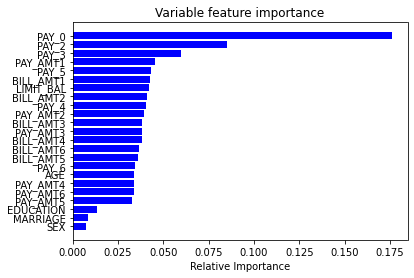

In [65]:
#Barplot to plot the features according to the importance

importance = rf_best.feature_importances_
indices = np.argsort(importance)
plt.title('Variable feature importance')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Based on the feature importance plot the best features are
- PAY_0
- PAY_2
- PAY_3
- PAY_AMT1
- PAY 5
- BILL_AMT1

## 5. Conceptual Questions:

### a) What are the best parameters from the Grid Search in Question # 3? Does the Model from #3 outperform Model #2? Explain why.

The best parameters from the Grid Search are:

                   (bootstrap=True, class_weight=None, criterion='gini',
                   max_depth=12, max_features=2, max_leaf_nodes=None,
                   min_impurity_decrease=0.0, min_impurity_split=None,
                   min_samples_leaf=1, min_samples_split=2,
                   min_weight_fraction_leaf=0.0, n_estimators=500,
                   n_jobs=None, oob_score=False, random_state=None,
                   verbose=0, warm_start=False)

Based on the model metrics we can clearly state that the model from question #3 has outperformed the model in question #2. Also, the model in question #2 is heavily prone to overfitting while the model in question #3 is optimal for predicting the class of the target variable.
This model performance can also be contributed towards finding the best parameters using Gridsearch. The initial model was trained using the default parameters and has hence contributed towards overfitting.

### b) Overfitting is always a concern in ML problems. Does Model #3 overfit data more or less than Model #2? Explain why you think this is the case.



Model #3 does not overfit the data as compared to model # 2 , the reason being model # 2 was on the features with default parameters, model # 3 was trained using the optimal parameters that we had idenitified using GridSearch, also we have used k-fold cross-validation while determining the optimal hyperparameters. Additionally, we've also compared the ROC_AUC scores of both training and test data sets and based on the scores we can conclude that the Model #2 is more prone to overfitting compared to Model #3

### c) The lecture notes describe the Gini Index which is the default criterion used for splitting in sklearn's version of RandomForestClassifier. How does the Gini Index work? (i.e. How is it used to build a top-performing model?).

Gini Index or Gini impurity, calculates the probability of a particular variable that is classified incorrectly when selected randomly. If all the elements of a variable belong to a single classs, then it can be termed as pure. 


The Gini index varies between values 0 and 1, where 0 imples that all the elements belong to a single class and 1 implies that the elements are randomly distributed across various classes. Gini Index of 0.5 imples that there's a equal distribution of the classes.

In theory, the top-performing model is built in such a way that features across the data have least Gene Index associated with them. Following is the formula of the gini index.

<img src="https://miro.medium.com/max/415/0*asbVp_8lwEsbfpOv.png" width=200 height=200 />


The Gini Index is calculated by deducting the sum of square of the probabilities of each class from one. Where Pi is the probability of an object bring classified to a particular class.

### d) Describe how Random Forest is different from bagging & why this difference can yield improved results.


Bagging is generally used to create samples of data when there isn't sufficient data present. The new dataset are created by sampling the data samples from the original dataset. The bootstrap method involves iteratively resampling a dataset with replacement.

One of the main advantages of use bagging is that it reduces variance of the model and while using bagging along with decision trees it's highly suggested to use deep decision trees because of high variance and low bias.

On the other hand Random forest can be described as generalized form of bagging. At each of the branches of the decision tree, Random Forest training involves subsampling of the features in addition to the training examples. Also, subsampling of the features removes corrleation between the features amongst the individual trees, which is better than Bagging.

The main difference is that in Random forests, only a subset of features are selected at random out of the total and the best split feature from the subset is used to split each node in a tree, unlike in bagging where all features are considered for splitting a node. Due to the random feature selection, the trees are more independent of each other compared to regular bagging, which often results in better predictive performance (due to better variance-bias trade-offs), and random forest is faster than bagging, because each tree learns only from a subset of features.

### e) Describe the importance of the max_depth parameter in Random Forest. Do not just provide a definition, rather think through how bias-variance tradeoff might be impacted by the max_depth parameter.

max_depth is, represents the depth of each tree in the random forest. The deeper the treem the more the splits it has and the more information it captures about the data.

A max_depth of 20 would limit trees at most 20 splits down on any given branch. In practise as the max depth of the decision tree increases, the performance of the model over the training set increases continuously. On the other hand as the max_depth value increases, the performance over the test set increases initially but after a certain point, it starts to decrease rapidly. The reason being,tree starts to overfit the training set and therefore is not able to generalize over the unseen points in the test set.

Alternatively, severely constraining max_depth could increase the bias of each tree. It may not be able to capture certain patterns in the data.However, this can be resolved by a suitable choice of n_estimators, coupled with bagging, ensures that the bias of the forest as a whole doesn’t increase in the process.

### f) In this homework we used k-fold cross-validation while determining the optimal hyperparameters for our Random Forest model. 1) Describe how k-fold cross-validation works. 2) What benefit do we gain by using k-fold cross-validation when tuning our Random Forest model versus only using the train-test split approach?

k-Fold cross validation approach involves random divison of the observation into k groups/folds, where each fold is used as a test set at some point.

In case of 5-fold cross validation the data set is split into 5 folds. In the first iteration, the first fold is used to test the model and the rest are used to train the model. In the second iteration, 2nd fold is used as the testing set while the rest serve as the training set. This process is repeated until each fold of the 5 folds have been used as the testing set.

The advantage of using the k-fold cross validation versus train-test split approach while tuning a Random Forest model is that cross-validation necessitates the model to train on multiple train-test splits rather than a single instance of train data. Training on multiple splits of data gives the model a better indication of the data and will accordingly perform well on unseen data. 